<a href="https://colab.research.google.com/github/yrodriguezmd/Surgical_instruments/blob/main/pilot/pseudolabels/using_vfnet/Pseudolabel_pilot15_vfnet_oct1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

In [ ]:
exit()

In [ ]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.10.0a1
torch v 1.9.0+cu102
torchvision v 0.10.0+cu102


In [ ]:
from icevision.all import *

In [ ]:
#option 1: git clone
#!git clone https://github.com/yrodriguezmd/sci5_kni5_cvat.git
!git clone https://github.com/yrodriguezmd/pilot15_for_pseudolabel.git
# initially run with no File9, later added

#option 2:
#colab upload

fatal: destination path 'pilot15_for_pseudolabel' already exists and is not an empty directory.


In [ ]:
!ls

install_colab.sh  install_colab.sh.1  pilot15_for_pseudolabel  sample_data


In [ ]:
!ls pilot15_for_pseudolabel/

File00001.jpg  File00005.jpg  File00009.jpg  File00013.jpg
File00002.jpg  File00006.jpg  File00010.jpg  File00014.jpg
File00003.jpg  File00007.jpg  File00011.jpg  File00015.jpg
File00004.jpg  File00008.jpg  File00012.jpg  README.md


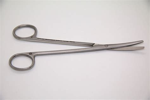

In [ ]:
image_path = Path('pilot15_for_pseudolabel/')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[0])
img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [ ]:
print(class_map.get_by_name('knife'))
print(class_map.get_by_name('scissors'))

44
77


In [11]:
from icevision.models.checkpoint import *

In [12]:
model_type = models.mmdet.vfnet
backbone = model_type.backbones.resnet50_fpn_mstrain_2x

In [ ]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map),)# **extra_args) 

In [14]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs/vfnet/vfnet_r50_fpn_mstrain_2x_coco.py'),
 'model_name': 'vfnet',
 'pretrained': True,
 'weights_url': 'https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mstrain_2x_coco/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth'}

In [15]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]

img_size = 384 

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

In [16]:
len(imgs_array)

15

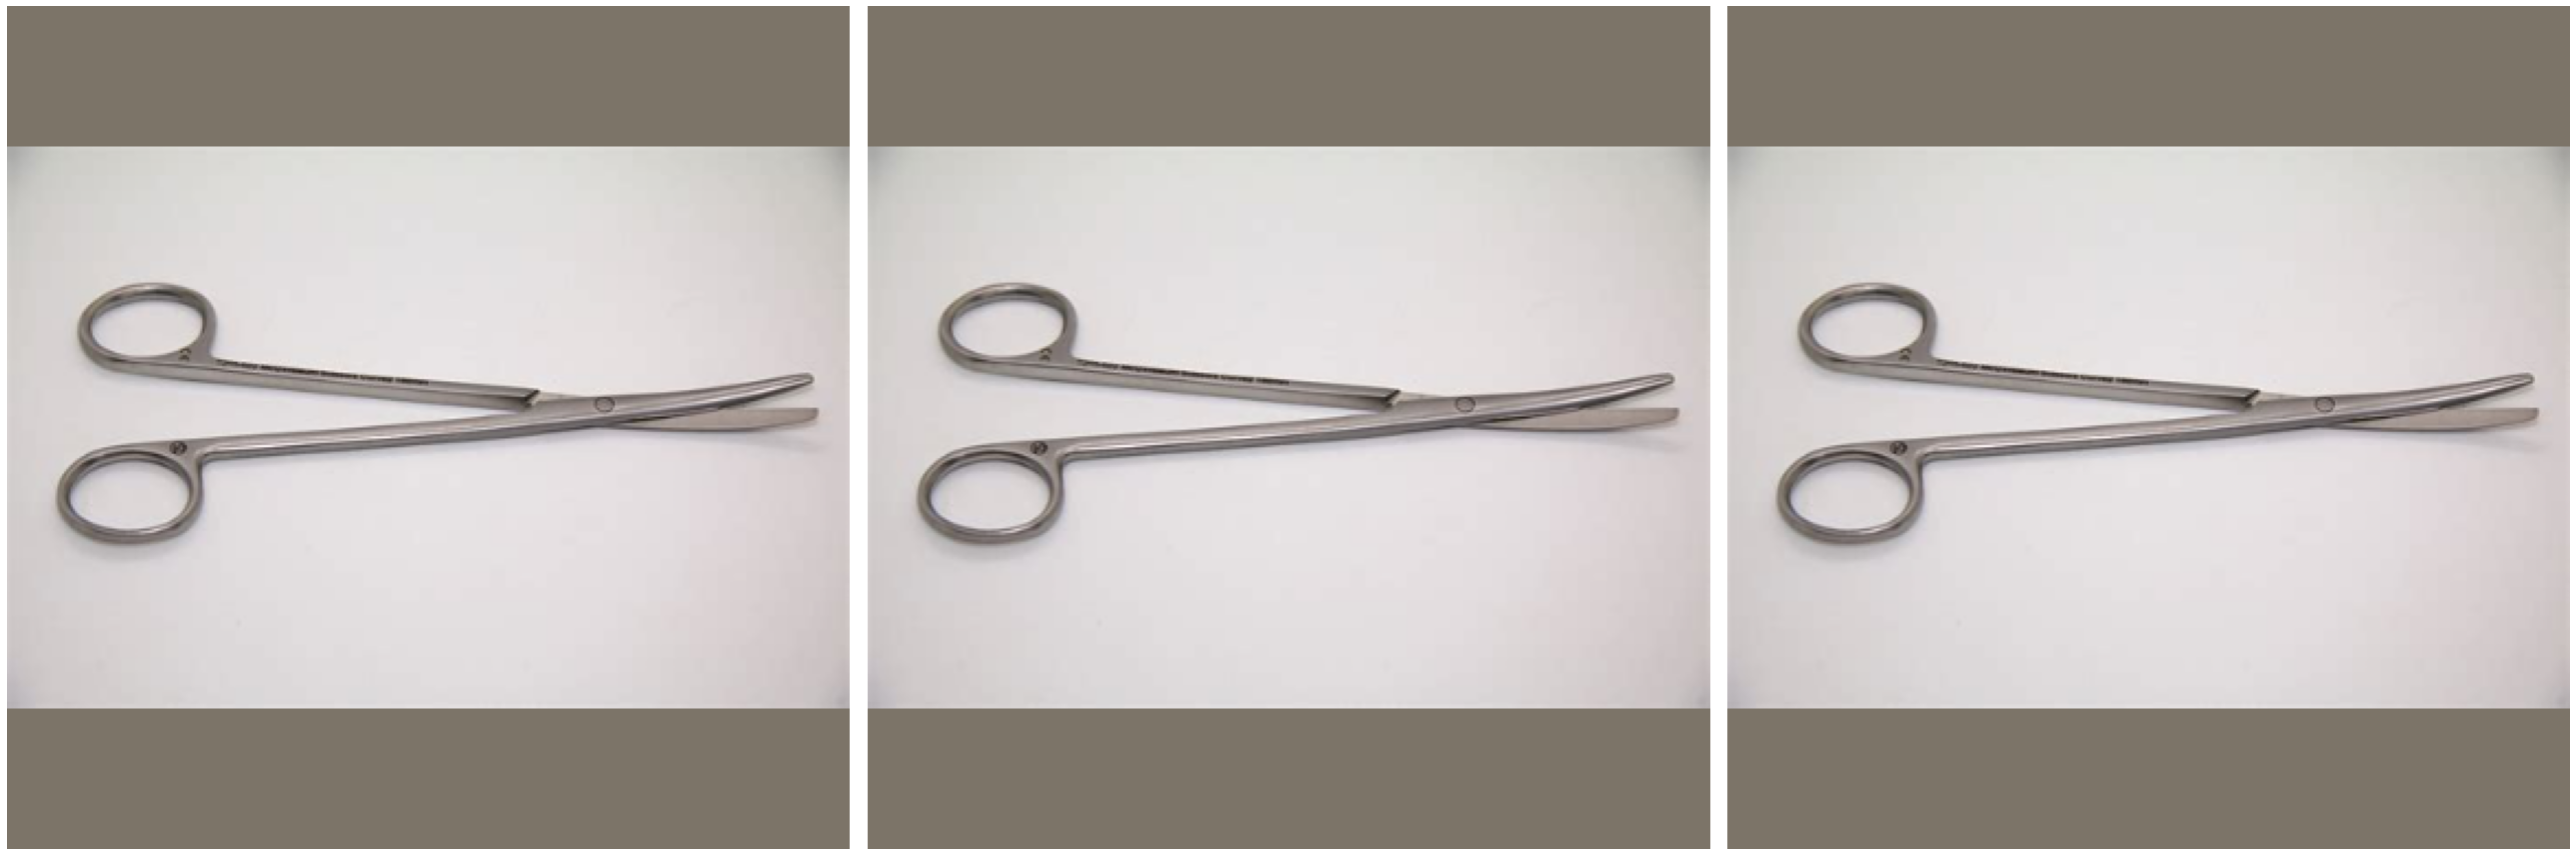

In [17]:
samples = [infer_ds[0] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [18]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl,
                                          keep_images=True,) 
  # detection_threshold =0.5 default

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


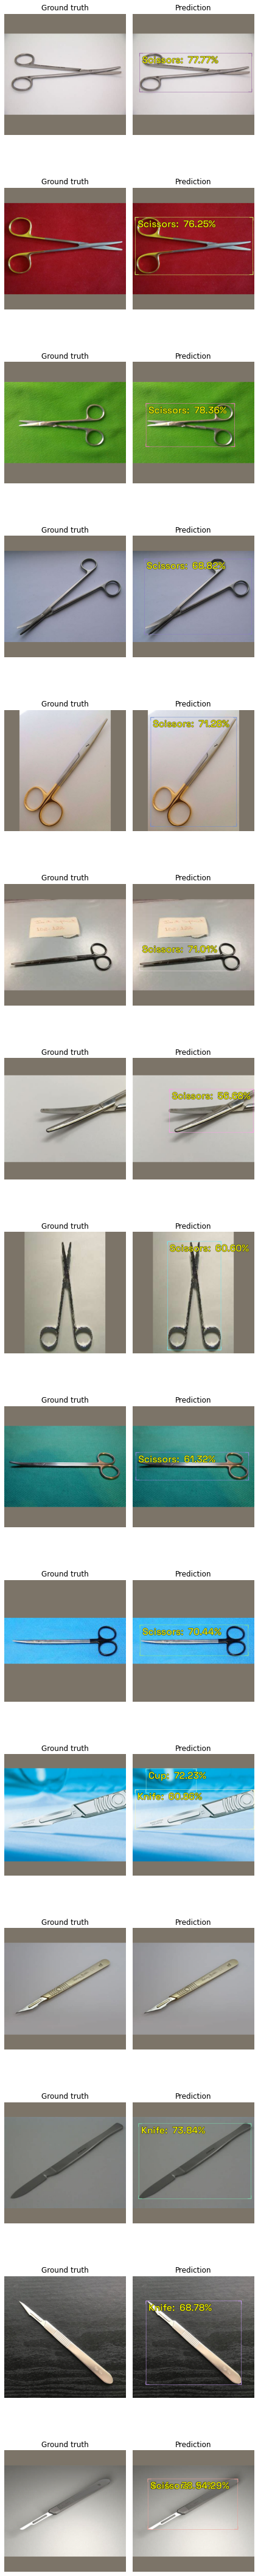

In [19]:
show_preds(preds_saved, font_size=30, label_color='#ffff00')
#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py

In [20]:
preds_saved[3].pred

BaseRecord

common: 
	- Record ID: 3
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
detection: 
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, 'cake': 56, 'chair': 57, 

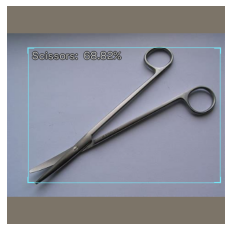

In [21]:
show_sample(preds_saved[3])

In [22]:
# adjusting base record to incorporate filepath
#https://github.com/airctic/icevision/blob/e60c2e2117c012ca5c323088f8577935a87c4f4e/icevision/core/record_components.py
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

In [23]:
# adding the filepath for each file after adjusting baserecord
for _ in range(len(preds_saved)): 
  preds_saved[_].set_filepath(img_files[_]) 

In [24]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred)

BaseRecord

common: 
	- Filepath: pilot15_for_pseudolabel/File00001.jpg
	- Img: None
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
	- Record ID: 0
detection: 
	- Scores: [    0.77773]
	- BBoxes: [<BBox (xmin:22.956771850585938, ymin:125.5943603515625, xmax:375.8294677734375, ymax:248.43954467773438)>]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup':

In [25]:
conv = convert_preds_to_coco_style(preds_saved) ##
conv
## bboxes in xmin(x top left), ymin (y top left), w, h
# same as convert_records_to_coco_style(preds_saved)
# https://github.com/airctic/icevision/blob/master/icevision/data/convert_records_to_coco_style.py#L78
# https://github.com/pytorch/vision/blob/master/references/detection/coco_utils.py

{'annotations': [{'area': 43348.71,
   'bbox': [22.956772, 125.59436, 352.87268, 122.845184],
   'category_id': 77,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.7777307},
  {'area': 67595.6,
   'bbox': [8.611313, 92.35286, 370.9577, 182.21916],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.76249826},
  {'area': 38495.33,
   'bbox': [42.358154, 131.17896, 279.57986, 137.68991],
   'category_id': 77,
   'id': 3,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.78360444},
  {'area': 80461.195,
   'bbox': [37.11174, 73.98214, 338.05548, 238.01181],
   'category_id': 77,
   'id': 4,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.68824875},
  {'area': 93427.75,
   'bbox': [57.275543, 24.057266, 270.317, 345.62292],
   'category_id': 77,
   'id': 5,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.71279716},
  {'area': 28452.406,
   'bbox': [22.475052, 184.46332, 315.55396, 90.166534],
   'category_id': 77,
   'id': 6,
   'image_id': 5,
 

In [26]:
conv['annotations'][3] # based on preds_saved

{'area': 80461.195,
 'bbox': [37.11174, 73.98214, 338.05548, 238.01181],
 'category_id': 77,
 'id': 4,
 'image_id': 3,
 'iscrowd': 0,
 'score': 0.68824875}

In [27]:
add_info = {
    "info": {
    "description": "Surgery Instruments",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2021,
    "contributor": "MR",
    "date_created": "2021/09/27"
    },
  "categories": [
                 ## adjusted to 80 classes, 
                 ## limiting categories
    {
      "supercategory": "kitchen",
      "id": 44,
      "name": "knife"
    },
    {
      "supercategory": "indoor",
      "id": 77,
      "name": "scissors"
    }
    ] }

In [28]:
annot = {**add_info, **conv}
annot

{'annotations': [{'area': 43348.71,
   'bbox': [22.956772, 125.59436, 352.87268, 122.845184],
   'category_id': 77,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.7777307},
  {'area': 67595.6,
   'bbox': [8.611313, 92.35286, 370.9577, 182.21916],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.76249826},
  {'area': 38495.33,
   'bbox': [42.358154, 131.17896, 279.57986, 137.68991],
   'category_id': 77,
   'id': 3,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.78360444},
  {'area': 80461.195,
   'bbox': [37.11174, 73.98214, 338.05548, 238.01181],
   'category_id': 77,
   'id': 4,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.68824875},
  {'area': 93427.75,
   'bbox': [57.275543, 24.057266, 270.317, 345.62292],
   'category_id': 77,
   'id': 5,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.71279716},
  {'area': 28452.406,
   'bbox': [22.475052, 184.46332, 315.55396, 90.166534],
   'category_id': 77,
   'id': 6,
   'image_id': 5,
 

In [29]:
## saving dictionary as json file

f = open('annot.json','w') 
f.write(str(annot)) 
f.close()

In [ ]:
# open json in VS code or text editor, replace ' with "
# upload in roboflow

In [ ]:
# roboflow annotated
# no transforms, no resizing on roboflow
# export annotated file (in coco json form) and images

In [ ]:
#!ls

In [ ]:
# after annotating in roboflow
# use images downloaded with the annotations
#parser = parsers.COCOBBoxParser(
#    annotations_filepath = Path('/content/pilot15_roboflow/_annotations.coco.json'), ##
#    img_dir = Path('/content/pilot15_roboflow/', ##
#    mask =False)
#)

In [30]:
#data_splitter = RandomSplitter([1.0,0])  # default 0.8,0.2
#train_records, valid_records = parser.parse(data_splitter)# default autofix=True

In [31]:
#show_records(train_records[:3],ncols=3, font_size=30, label_color = '#ffff00')

In [32]:
#show_records(train_records[3:],ncols=3, font_size=30, label_color = '#ffff00')


In [ ]:
## option to decrease detection threshold, to have more baseline annotations, but mostly
#  incorrect